# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. 

The deliverables include the model evaluation (and interpretation if applicable), data visualizations of my choice that is directly related to the question I ask, ethical considerations, and the resources I used to troubleshoot and find answers or solutions.


# **PACE stages**


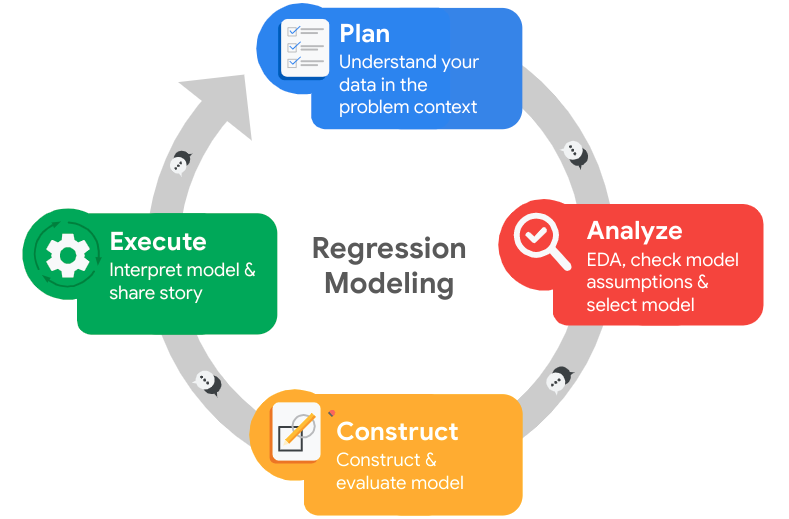

## **Pace: Plan**

Consider the questions in the PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to me as a data analytics professional and ask me to provide data-driven suggestions based on my understanding of the data. They have the following question: what’s likely to make the employee leave the company?

My goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If I can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Understand the HR dataset

The dataset in this capstone contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as I complete the plan stage.

*  Who are my stakeholders for this project?
- What am I trying to solve or accomplish?
- What are my initial observations when I explore the data?
- What resources do I use?
- Any ethical considerations in this stage?




1. Current employees and potential employees. Hr department.

2. Figure out which factor make the employee leave the company and analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

3. 'Work_accident', 'left' and 'promotion_last_5years' contains binary 0 and 1 values. 'Department' and 'salary' contain text values. The rest of the columns have numerical values and all have similar mean and median values. The 'average_montly_hours' has higher value compare to other numerical columns which could cause problem with training.

4. Pandas user guide is helpful. https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html

5. No ethical considerations as the data keeps employees' privacy safe.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

# Import packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand the variables
- Clean the dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = df0.rename(columns = {"Work_accident":"work_accident", "Department":"department"})


# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0.duplicated().sum()


np.int64(3008)

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()]


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df0_dropdup = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
df0_dropdup.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

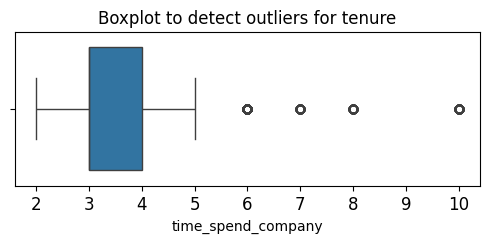

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df0_dropdup['time_spend_company'])
plt.show()

In [12]:
# Determine the number of rows containing outliers
percentile25 = df0_dropdup["time_spend_company"].quantile(0.25)
percentile75 = df0_dropdup["time_spend_company"].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

df0_dropdup.loc[df0_dropdup["time_spend_company"] > upper_limit, "time_spend_company"].shape
# eliminate outliers
df0_dropdup.loc[df0_dropdup["time_spend_company"] > upper_limit, "time_spend_company"] = upper_limit

C:\Users\yanpu\AppData\Local\Temp\ipykernel_14648\2728824280.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df0_dropdup.loc[df0_dropdup["time_spend_company"] > upper_limit, "time_spend_company"] = upper_limit


Certain types of models are more sensitive to outliers than others. Once I get to the stage of building model, consider whether to remove outliers, based on the type of model I decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions.

- What did I observe about the relationships between variables?
- What do I observe about the distributions in the data?
- What transformations did I make with the data? Why did I chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do I find myself using as I complete this stage? (Make sure to include the links.)
- Do I have any ethical considerations in this stage?




3. I upsampled the data as the 'left' class is unbalenced and downsampling the dataset could cause lossing information about the original dataset.
4. Fully understand the dataset so we can choose a more suitable model.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
print(df0_dropdup["left"].value_counts())

# Get percentages of people who left vs. stayed
print(df0_dropdup["left"].value_counts(normalize=True))


left
0    10000
1     1991
Name: count, dtype: int64
left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


Approximately 83.4% of people who stayed and 16.6% of the people who left. The outcome variable is not very balanced. Hence, we should upsample the minority class.

In [14]:
# Use resampling to create class balance in the outcome variable, if needed

# Identify data points from majority and minority classes
data_majority = df0_dropdup[df0_dropdup["left"] == 0]
data_minority = df0_dropdup[df0_dropdup["left"] == 1]

# Upsample the minority class (which is "verified")
data_minority_upsampled = resample(data_minority,
                                 replace=True,                 # to sample with replacement
                                 n_samples=len(data_majority), # to match majority class
                                 random_state=0)               # to create reproducible results

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

# Display new class counts
data_upsampled["left"].value_counts()

left
0    10000
1    10000
Name: count, dtype: int64

### Data visualizations

Now, examine variables and create plots to visualize relationships between variables in the data.

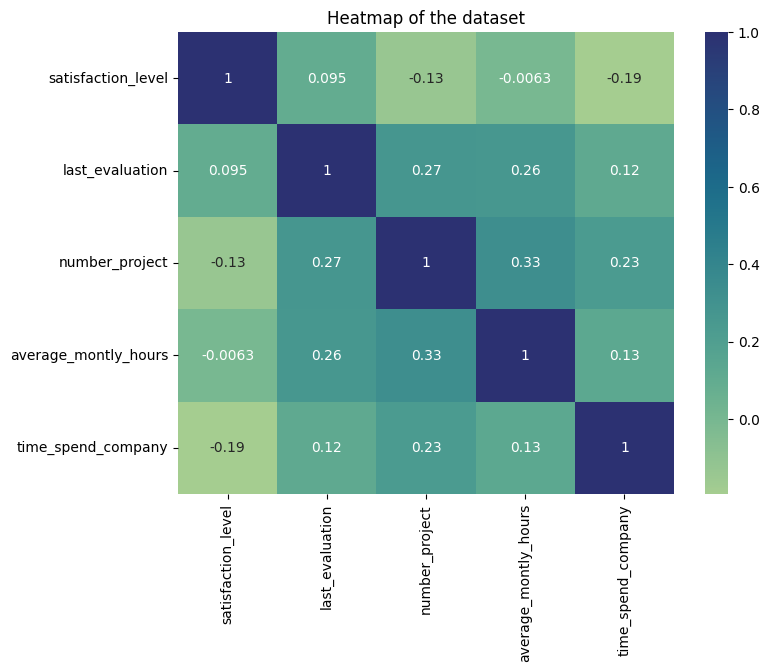

In [15]:
# heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(
    df0_dropdup[["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", 
                    "time_spend_company"]]
    .corr(), 
    annot=True, 
    cmap="crest")
plt.title("Heatmap of the dataset")
plt.show()

<Axes: xlabel='left', ylabel='satisfaction_level'>

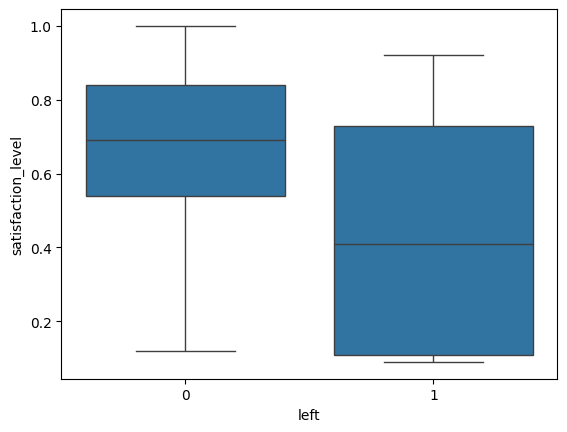

In [16]:
# left VS. satisfaction_level
sns.boxplot(x="left", y="satisfaction_level", data=df0_dropdup)


<Axes: xlabel='satisfaction_level', ylabel='Count'>

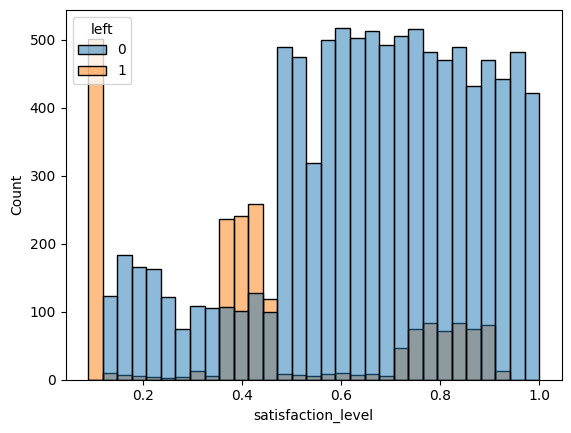

In [17]:
# left VS. satisfaction_level
sns.histplot(
    x="satisfaction_level",
    hue="left",
    data=df0_dropdup
)

<Axes: xlabel='left', ylabel='last_evaluation'>

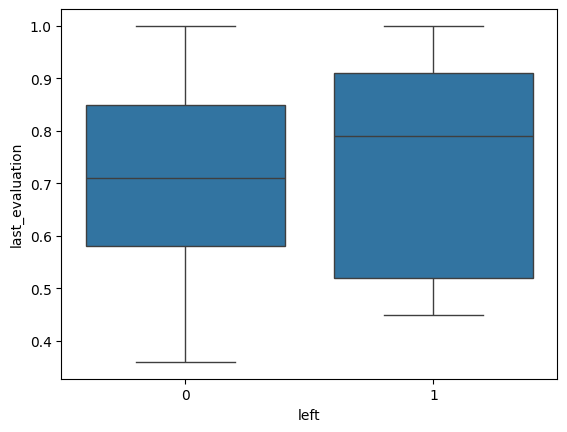

In [18]:
# left VS. last_evaluation
sns.boxplot(x="left", y="last_evaluation", data=df0_dropdup)


<Axes: xlabel='last_evaluation', ylabel='Count'>

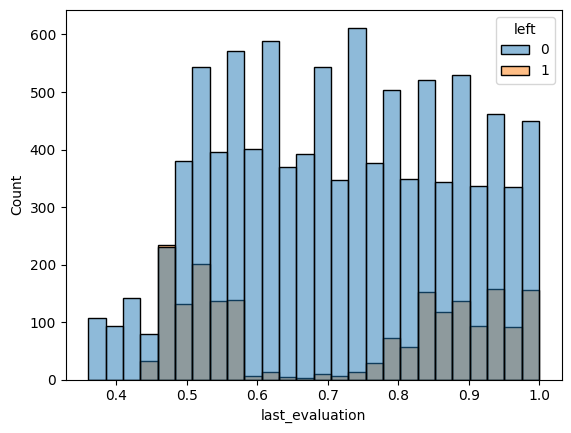

In [19]:
# left VS. last_evaluation
sns.histplot(
    x="last_evaluation",
    hue="left",
    data=df0_dropdup
)


<Axes: xlabel='left', ylabel='number_project'>

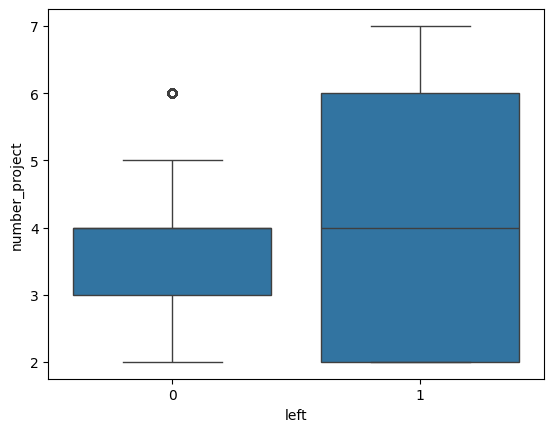

In [20]:
# left VS. number_project
sns.boxplot(x="left", y="number_project", data=df0_dropdup)

<Axes: xlabel='average_montly_hours', ylabel='Count'>

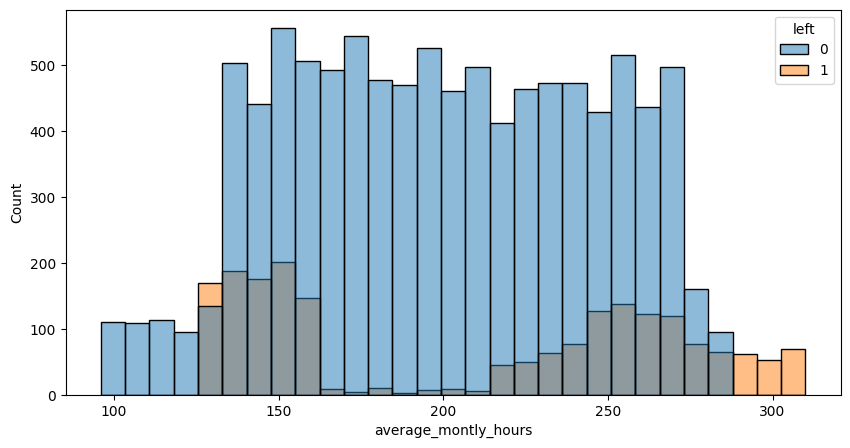

In [21]:
# left VS. average_montly_hours
plt.figure(figsize=(10, 5))
sns.histplot(
    x="average_montly_hours",
    hue="left",
    data=df0_dropdup
)

<Axes: xlabel='left', ylabel='time_spend_company'>

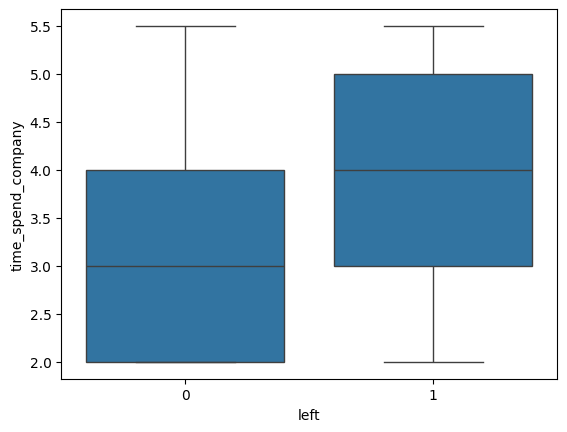

In [22]:
# left VS. time_spend_company
sns.boxplot(x="left", y="time_spend_company", data=df0_dropdup)

<Axes: xlabel='number_project', ylabel='satisfaction_level'>

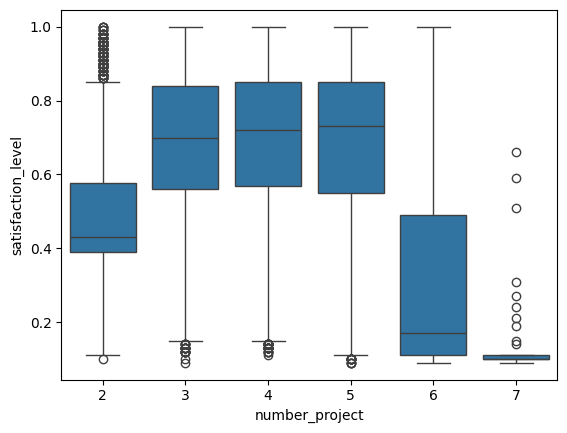

In [23]:
# number_project VS. satisfaction_level
sns.boxplot(
    x="number_project",
    y="satisfaction_level",
    data=df0_dropdup
)


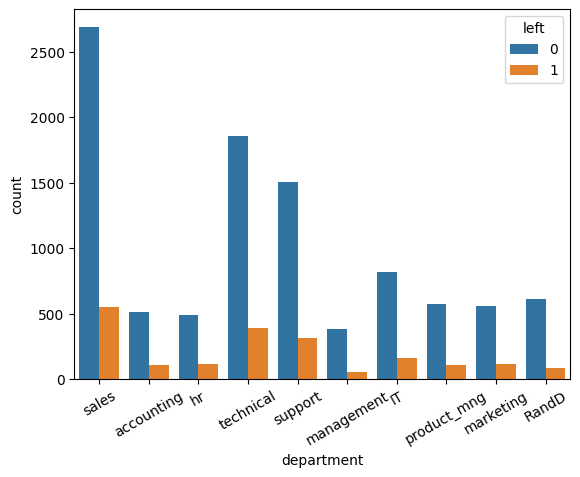

In [47]:
# department VS. left
sns.countplot(
    x="department",
    hue="left",
    data=df0_dropdup
)
plt.xticks(rotation=30)
plt.show()

<Axes: xlabel='salary', ylabel='count'>

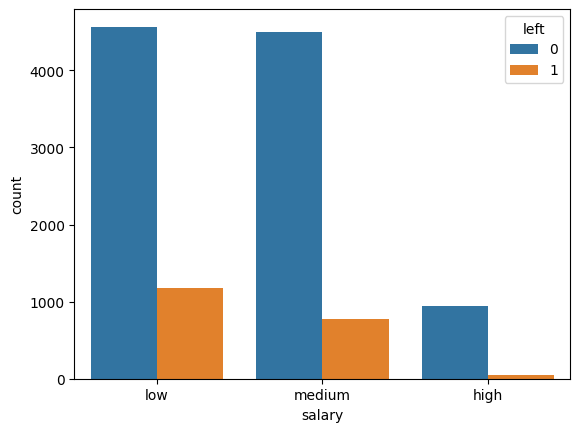

In [25]:
# salary VS. left
sns.countplot(
    x="salary",
    hue="left",
    data=df0_dropdup
)


### Insights

- From the heatmap we observe that no variables are correlated, thus, no severe multicollinearity among the features.
- Employees with lower salary tend to leave the company.
- From the boxplot and histogram, we observe that employees who left are widely distributed in different satisfication however employees tend to leave when they have low satisfaction or high satisfaction (0.8) with company.
- Average montly hours have similar pattern as satisfaction.
- Employees who have either very small or very large number of projects tned to leave the company.
- Employees who spent more time in company are likely to leave.
- When employees have small or large amount of projects, they feel less satisfied about the company.
- From the 'department VS. left' graph, we observe that people left and stayed has similar distribution, hence, department variable does not affect employees' leaving rate.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions.

- Do I notice anything odd?
- Which independent variables did I choose for the model and why?
- Are each of the assumptions met?
- How well does the model fit the data?
- Can I improve it? Is there anything I would change about the model?
- What resources do I find myself using as I complete this stage? (Make sure to include the links.)
- Do I have any ethical considerations in this stage?



1. The department variable seems has no impact on the prediction results.
2. I choose 'left' as the independent variables as we are interested in employee will leave or stay.
3. I would say most of the Logistic Regression model assumptions are met.
4. With both of the precision and the recall scores are above 75% for leave and stay, the model fit the date really well.
5. Yes, I could remove some variables that has small impact on the independent variable.
6. LogisticRegression https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
7. The model needs to be well tested as the predict result could harm employee.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

This is a binary classification prediction task.

### Identify the types of models most appropriate for this task.

In the analyze stage, we found out the variables have no multicollinearity and the dataset has binary outcome 'left', large sample size and no extreme outliers, hence, the Logistic Regression model assumptions are satisfied.

### Modeling

In [26]:
# Select outcome variable
data_upsampled.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.58,0.74,4,215,3.0,0,0,0,sales,low
1,0.82,0.67,2,202,3.0,0,0,0,sales,low
2,0.45,0.69,5,193,3.0,0,0,0,sales,low
3,0.78,0.82,5,247,3.0,0,0,0,sales,low
4,0.49,0.60,3,214,2.0,0,0,0,sales,low


In [27]:
# Select outcome variable
y = data_upsampled["left"]

In [28]:
# Select features
X = data_upsampled[["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", "time_spend_company",
                   "work_accident", "promotion_last_5years", "salary"]] # Here, we omit "department" since it has minor impact to the result.
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,salary
0,0.58,0.74,4,215,3.0,0,0,low
1,0.82,0.67,2,202,3.0,0,0,low
2,0.45,0.69,5,193,3.0,0,0,low
3,0.78,0.82,5,247,3.0,0,0,low
4,0.49,0.60,3,214,2.0,0,0,low


In [29]:
# Check data types
X.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company       float64
work_accident              int64
promotion_last_5years      int64
salary                    object
dtype: object

In [30]:
# Select the training features that needs to be encoded
X_to_encode = X[["salary"]]

# Display first few rows
X_to_encode.head()

,salary
0,low
1,low
2,low
3,low
4,low


In [31]:
# Set up an encoder for one-hot encoding the categorical features
X_encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the training features using the encoder
X_encoded = X_encoder.fit_transform(X_to_encode)

In [32]:
X_encoder.get_feature_names_out()

array(['salary_low', 'salary_medium'], dtype=object)

In [33]:
X_encoded

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], shape=(20000, 2))

In [ ]:
# Place encoded training features (which is currently an array) into a dataframe
X_encoded_df = pd.DataFrame(data=X_encoded, columns=X_encoder.get_feature_names_out())

# Display first few rows
X_encoded_df.head()

,salary_low,salary_medium
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [35]:
X.drop(columns = ["salary"]).head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
0,0.58,0.74,4,215,3.0,0,0
1,0.82,0.67,2,202,3.0,0,0
2,0.45,0.69,5,193,3.0,0,0
3,0.78,0.82,5,247,3.0,0,0
4,0.49,0.60,3,214,2.0,0,0


In [36]:
# Concatenate `X` and `X_encoded_df` to form the final dataframe.
# Note: Using `.reset_index(drop=True)` to reset the index in X after dropping `salary`,
# so that the indices align with those in `X_encoded_df`
X_final = pd.concat([X.drop(columns=["salary"]).reset_index(drop=True), X_encoded_df], axis=1)

# Display first few rows
X_final.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,salary_low,salary_medium
0,0.58,0.74,4,215,3.0,0,0,1.0,0.0
1,0.82,0.67,2,202,3.0,0,0,1.0,0.0
2,0.45,0.69,5,193,3.0,0,0,1.0,0.0
3,0.78,0.82,5,247,3.0,0,0,1.0,0.0
4,0.49,0.60,3,214,2.0,0,0,1.0,0.0


In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15000, 9), (5000, 9), (15000,), (5000,))

In [38]:
# Construct a logistic regression model and fit it to the training set
log_clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train, y_train)

In [39]:
# Use the logistic regression model to get predictions on the encoded testing set
y_pred = log_clf.predict(X_test)

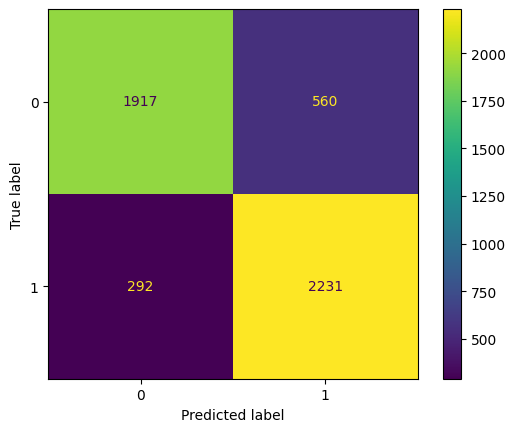

In [40]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

In [41]:
(1917 + 2231) / (1917 + 560 + 292 + 2231)

0.8296

In [42]:
y.unique()

array([0, 1])

In [43]:
# Create classification report for logistic regression model
target_labels = ["stay", "left"]
print(classification_report(y_test, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

        stay       0.87      0.77      0.82      2477
        left       0.80      0.88      0.84      2523

    accuracy                           0.83      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       0.83      0.83      0.83      5000



In [44]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
pd.DataFrame(data={"Feature Name":log_clf.feature_names_in_, "Model Coefficient":log_clf.coef_[0]})

,Feature Name,Model Coefficient
0,satisfaction_level,-4.781290
1,last_evaluation,0.890664
2,number_project,-0.546818
3,average_montly_hours,0.003650
4,time_spend_company,1.070428
5,work_accident,-1.424252
6,promotion_last_5years,-1.504148
7,salary_low,1.815053
8,salary_medium,1.396644


In [45]:
pd.DataFrame(data={"Feature Name":log_clf.feature_names_in_, "Model Coefficient":np.exp(log_clf.coef_[0])})

,Feature Name,Model Coefficient
0,satisfaction_level,0.008385
1,last_evaluation,2.436747
2,number_project,0.578789
3,average_montly_hours,1.003657
4,time_spend_company,2.916627
5,work_accident,0.240689
6,promotion_last_5years,0.222207
7,salary_low,6.141399
8,salary_medium,4.041613


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions.

- What key insights emerged from my model?
- What business recommendations do I propose based on the models built?
- What potential recommendations would I make to my manager/company?
- Can I improve the model? Why or why not? How?
- Given what I know about the data and the models I were using, what other questions could I address for the team?
- What resources do I find myself using as I complete this stage? (Make sure to include the links.)
- Do I have any ethical considerations in this stage?



1. Several important insights emerged from the logistic regression model:

- Employee satisfaction level was the strongest predictor of attrition. Employees with low satisfaction were far more likely to leave than any other group.

- Compensation matters: employees with low and medium salaries had a significantly higher likelihood of leaving compared to high-salary employees.

- Tenure and performance effects were notable. Employees with longer tenure and higher last evaluation scores were more likely to leave, suggesting burnout or external job opportunities for high performers.

- Promotions reduce attrition. Employees who received a promotion in the last five years were much less likely to leave.

- Monthly hours had only a minor impact compared to satisfaction, salary, and promotions.

- These insights suggest that attrition is driven more by engagement and career progression than by raw workload alone.

2. Based on the model results, the following recommendations are proposed:

- Prioritize employee satisfaction initiatives, such as regular engagement surveys and manager training, since satisfaction had the strongest negative relationship with attrition.

- Review compensation structures, particularly for low- and medium-salary employees, who show a much higher risk of leaving.

- Introduce clearer career progression paths, including more frequent promotions or role changes for long-tenured employees.

- Pay special attention to high-performing employees, as they appear more likely to leave despite strong evaluations.

- Use the model as an early warning system to identify employees at high risk of attrition and intervene proactively.

3. To management, I would recommend:

- Implementing targeted retention strategies instead of one-size-fits-all policies.

- Allocating retention budgets toward salary adjustments and promotions for high-risk groups identified by the model.

- Using attrition predictions to support workforce planning, reducing unexpected turnover.

- Regularly retraining and monitoring the model to ensure predictions remain accurate as company conditions change.

4. Yes, the model could be improved:

- Feature engineering: including additional variables such as job role level, manager quality, remote work status, or employee engagement survey results.

- Non-linear models: trying tree-based models (Random Forest, Gradient Boosting, XGBoost) could capture interactions missed by logistic regression.

- Hyperparameter tuning and cross-validation could improve generalization.

- Better handling of class imbalance, such as comparing SMOTE with class-weighted models.

- Model evaluation improvements, focusing on recall and ROC-AUC rather than accuracy alone.

5. Given the data and modeling approach, other useful questions include:

- Which departments have the highest predicted attrition risk?

- What is the expected cost of attrition, and how much could be saved by targeted interventions?

- How does attrition risk change over an employee’s lifecycle?

- Are there interaction effects (e.g., low salary * high workload) that increase risk?

- Can we identify early signals of disengagement before satisfaction drops?

6. 
- Scikit-learn documentation (Logistic Regression):
https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

- Pandas documentation:
https://pandas.pydata.org/docs/

- Seaborn visualization library:
https://seaborn.pydata.org/


7. Several ethical considerations apply:

- Bias and fairness: The model may unintentionally disadvantage certain groups if salary, department, or promotion access reflects historical bias.

- Transparency: Employees should not be penalized solely based on a model prediction; predictions should support, not replace, human judgment.

- Privacy: Employee data must be handled securely and used only for legitimate HR purposes.

- Responsible use: The model should be used to improve employee experience and retention—not to preemptively terminate or unfairly monitor employees.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

The classification model achieved an overall accuracy of 83%, indicating strong predictive performance on the test data. Precision and recall are well balanced across both classes, with the model correctly identifying employees who leave with a high recall of 88%, which is particularly important for attrition prediction. The F1-scores for both “stay” (0.82) and “left” (0.84) suggest the model performs consistently and does not heavily favor one class over the other. The macro and weighted averages further confirm that the model handles class balance effectively and generalizes well across outcomes.

### Conclusion, Recommendations, Next Steps

Overall, the model is effective as a decision-support tool for identifying employees at risk of leaving and can help guide proactive retention strategies. Based on the results, the company should focus on improving employee satisfaction, reviewing compensation structures, and providing clearer promotion pathways, especially for high-performing and long-tenured employees. As next steps, the model could be improved by incorporating additional features (such as role level or engagement metrics), testing more complex models, and fine-tuning decision thresholds to prioritize recall for attrition cases. Regular monitoring and retraining are also recommended to ensure the model remains accurate and ethically applied as workforce dynamics change.